# Laboratorio 3 Deep Learning

#### Juan Andrés Galicia Reyes 20298
#### Stefan Quintana 191630

### Librerias

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import keras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

### Exploración

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [6]:
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


In [18]:
train["label"].dtype

dtype('int64')

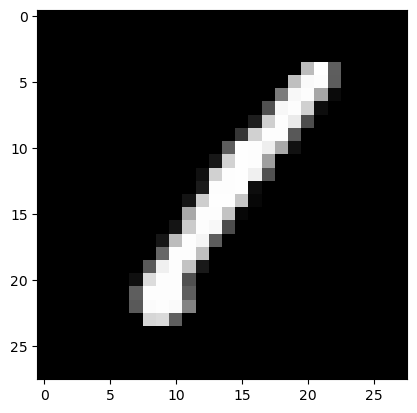

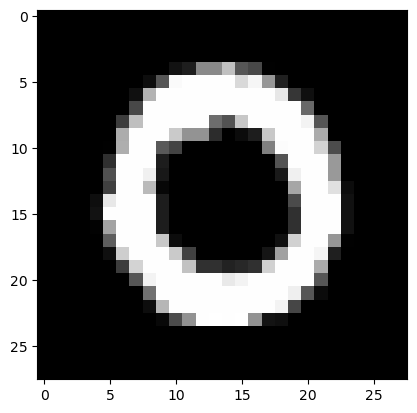

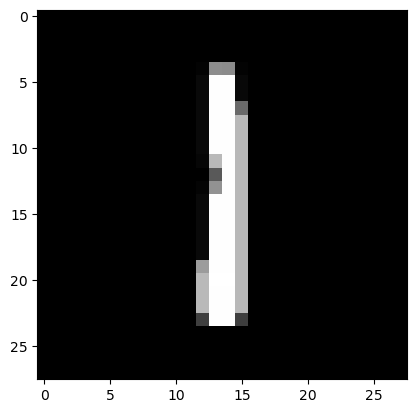

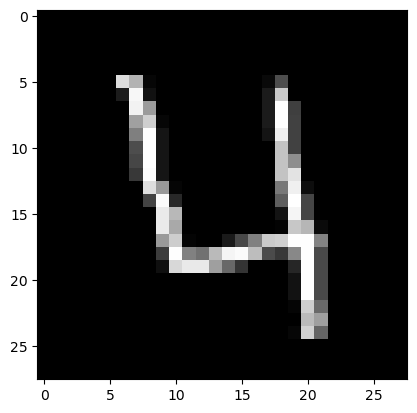

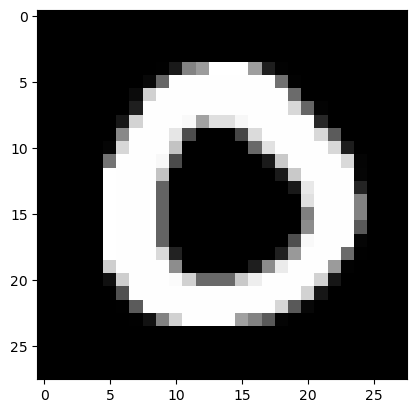

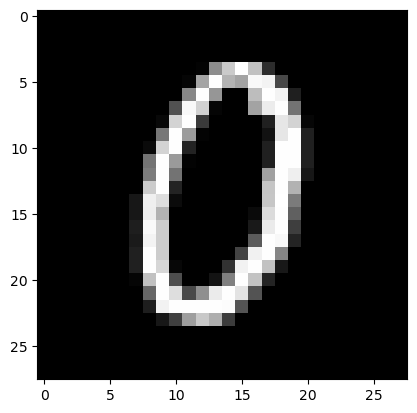

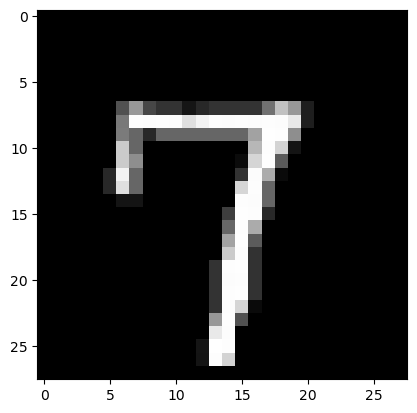

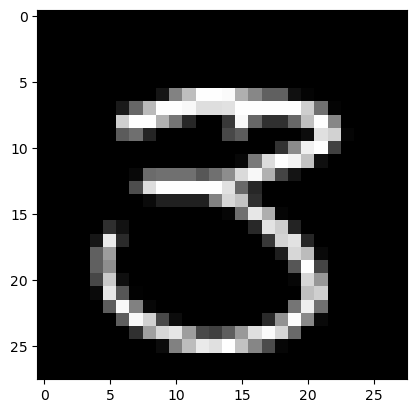

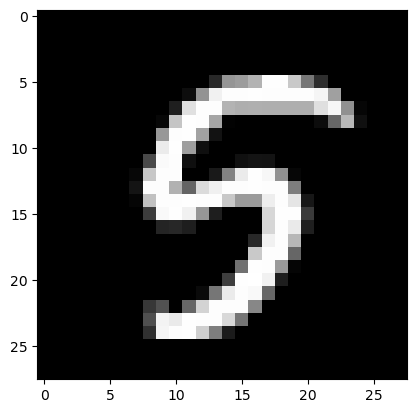

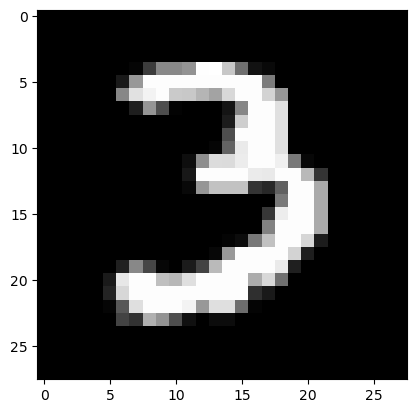

In [63]:
for i in range(0,10):
    firstImTrain = train.iloc[i,1:]
    image_array = firstImTrain.values.reshape(28, 28)
    plt.imshow(image_array, cmap="gray")
    plt.show()

In [8]:
print(train.dtypes)
print(test.dtypes)

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 784, dtype: object


In [83]:
ttrain, ttest = train_test_split(train, test_size=0.3, random_state=2023)

In [141]:
X_ttrain = ttrain.iloc[:,1:]
y_ttrain = ttrain.iloc[:,0]
X_ttest = ttest.iloc[:,1:]
y_ttest = ttest.iloc[:,0]
X_ttrain, X_ttest = X_ttrain/255.0 , X_ttest/255.0
X_test = test / 255.0

In [22]:
len(X_ttrain)

29400

### FFNN

In [49]:
ffnn = Sequential()
ffnn.add(Dense(512, activation='relu', input_shape=(784,)))
ffnn.add(Dense(256, activation="relu"))
ffnn.add(Dropout(0.3))
ffnn.add(Dense(128, activation="relu"))
ffnn.add(Dropout(0.3))
ffnn.add(Dense(64, activation="tanh"))
ffnn.add(Dropout(0.3))
ffnn.add(Dense(10, activation="softmax"))

In [50]:
ffnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", 
             metrics=["accuracy", "sparse_categorical_accuracy"])

In [51]:
ffnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               401920    
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)               

In [52]:
history = ffnn.fit(X_ttrain, y_ttrain, epochs=10, batch_size=200, 
                   validation_data=(X_ttest,y_ttest), verbose=1)

Epoch 1/10
147/147 [==============================] - 2s 11ms/step - loss: 0.5664 - accuracy: 0.8292 - sparse_categorical_accuracy: 0.8292 - val_loss: 0.1694 - val_accuracy: 0.9487 - val_sparse_categorical_accuracy: 0.9487
Epoch 2/10
147/147 [==============================] - 1s 10ms/step - loss: 0.1914 - accuracy: 0.9477 - sparse_categorical_accuracy: 0.9477 - val_loss: 0.1251 - val_accuracy: 0.9635 - val_sparse_categorical_accuracy: 0.9635
Epoch 3/10
147/147 [==============================] - 1s 9ms/step - loss: 0.1234 - accuracy: 0.9668 - sparse_categorical_accuracy: 0.9668 - val_loss: 0.1053 - val_accuracy: 0.9687 - val_sparse_categorical_accuracy: 0.9687
Epoch 4/10
147/147 [==============================] - 1s 10ms/step - loss: 0.0916 - accuracy: 0.9747 - sparse_categorical_accuracy: 0.9747 - val_loss: 0.1007 - val_accuracy: 0.9710 - val_sparse_categorical_accuracy: 0.9710
Epoch 5/10
147/147 [==============================] - 1s 10ms/step - loss: 0.0717 - accuracy: 0.9797 - sparse

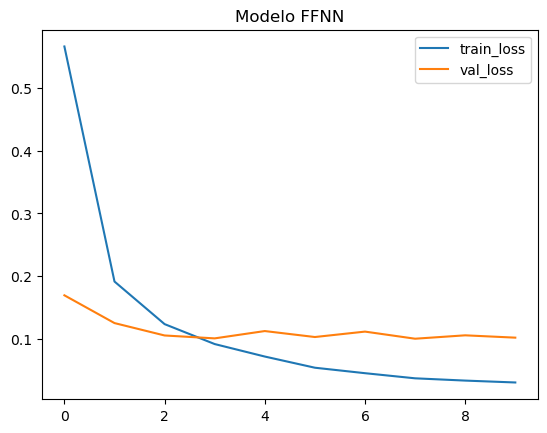

In [138]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Modelo FFNN")
plt.show()

In [55]:
test_loss, test_accuracy, test_sparse_categorical_accuracy = ffnn.evaluate(X_ttest, y_ttest)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Sparse Categorical Accuracy:", test_sparse_categorical_accuracy)

394/394 [==============================] - 1s 2ms/step - loss: 0.1018 - accuracy: 0.9763 - sparse_categorical_accuracy: 0.9763
Test Loss: 0.10183393210172653
Test Accuracy: 0.9763492345809937
Test Sparse Categorical Accuracy: 0.9763492345809937


In [58]:
y_pred = ffnn.predict(X_ttest)
y_pred_labels = np.argmax(y_pred, axis=1)

# Create a confusion matrix
confusion_mtx = confusion_matrix(y_ttest, y_pred_labels)

# Define class labels for visualization
class_names = np.arange(10)

394/394 [==============================] - 1s 2ms/step


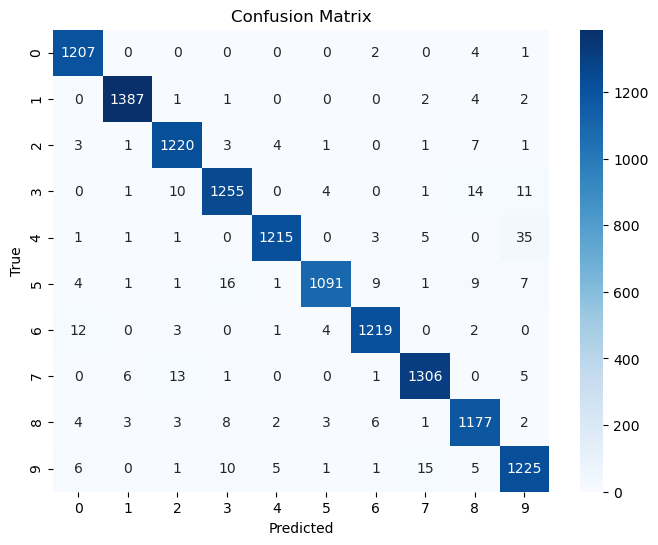

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### CNN

In [142]:
scaler = StandardScaler()
X_ttrain_scaled = scaler.fit_transform(X_ttrain)
#y_ttrain_scaled = scaler.fit_transform(y_ttrain)
X_ttest_scaled = scaler.transform(X_ttest)
X_ttrain_reshaped = X_ttrain_scaled.reshape(-1, 28, 28, 1)
#y_ttrain_reshaped = y_ttrain.reshape(-1, 28, 28, 1)
X_ttest_reshaped = X_ttest_scaled.reshape(-1, 28, 28, 1)
y_ttrain_one_hot = to_categorical(y_ttrain, num_classes=10)
y_ttest_one_hot = to_categorical(y_ttest, num_classes=10)


X_test_scaled = scaler.transform(X_test)
X_test_reshaped = X_test_scaled.reshape(-1, 28, 28, 1)

In [93]:
cnn = Sequential()
cnn.add(Conv2D(256, kernel_size=(4,4), activation="relu", input_shape=(28,28,1), padding="same"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(128, kernel_size=(4,4), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(64, activation="relu"))
cnn.add(Dense(10, activation="softmax"))

In [94]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", 
             metrics=["accuracy", "sparse_categorical_accuracy"])

In [95]:
cnn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 256)       4352      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       524416    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 128)         0         
                                                                 
 flatten_4 (Flatten)         (None, 3200)            

In [96]:
history_cnn = cnn.fit(X_ttrain_reshaped, y_ttrain, epochs=10, batch_size=200,
                     validation_data=(X_ttest_reshaped,y_ttest), verbose=1)

Epoch 1/10
147/147 [==============================] - 106s 715ms/step - loss: 0.3387 - accuracy: 0.8924 - sparse_categorical_accuracy: 0.8924 - val_loss: 0.0816 - val_accuracy: 0.9748 - val_sparse_categorical_accuracy: 0.9748
Epoch 2/10
147/147 [==============================] - 107s 726ms/step - loss: 0.0893 - accuracy: 0.9721 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.0536 - val_accuracy: 0.9836 - val_sparse_categorical_accuracy: 0.9836
Epoch 3/10
147/147 [==============================] - 108s 734ms/step - loss: 0.0620 - accuracy: 0.9801 - sparse_categorical_accuracy: 0.9801 - val_loss: 0.0522 - val_accuracy: 0.9843 - val_sparse_categorical_accuracy: 0.9843
Epoch 4/10
147/147 [==============================] - 106s 724ms/step - loss: 0.0486 - accuracy: 0.9851 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0412 - val_accuracy: 0.9887 - val_sparse_categorical_accuracy: 0.9887
Epoch 5/10
147/147 [==============================] - 106s 720ms/step - loss: 0.0414 - accuracy:

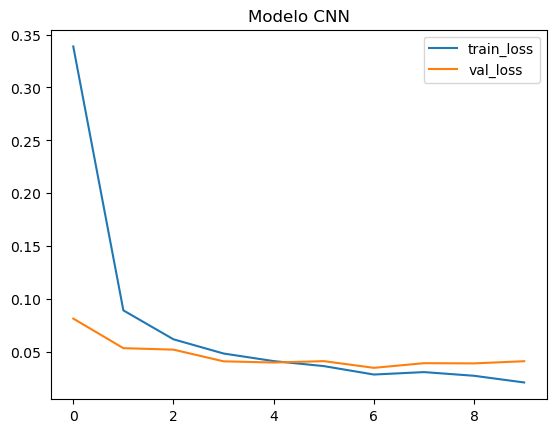

In [139]:
plt.plot(history_cnn.history['loss'], label='train_loss')
plt.plot(history_cnn.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Modelo CNN")
plt.show()

In [102]:
test_losscnn, test_accuracycnn, test_sparse_categorical_accuracycnn = cnn.evaluate(X_ttest_reshaped, y_ttest)
print("Test Loss:", test_losscnn)
print("Test Accuracy:", test_accuracycnn)
print("Test Sparse Categorical Accuracy:", test_sparse_categorical_accuracycnn)

394/394 [==============================] - 10s 24ms/step - loss: 0.0413 - accuracy: 0.9900 - sparse_categorical_accuracy: 0.9900
Test Loss: 0.04129611700773239
Test Accuracy: 0.9900000095367432
Test Sparse Categorical Accuracy: 0.9900000095367432


In [103]:
y_pred_cnn = cnn.predict(X_ttest_reshaped)
y_pred_labels_cnn = np.argmax(y_pred_cnn, axis=1)

# Create a confusion matrix
confusion_mtx_cnn = confusion_matrix(y_ttest, y_pred_labels_cnn)

# Define class labels for visualization
class_names_cnn = np.arange(10)

394/394 [==============================] - 10s 25ms/step


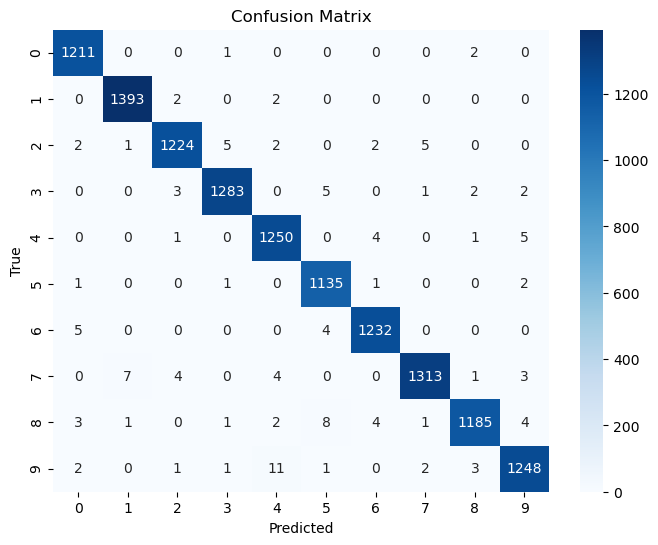

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_cnn, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names_cnn, yticklabels=class_names_cnn)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### SVD

In [132]:
svm_classifier = SVC(kernel='poly', C=1.0, random_state=2023, verbose=True)

# Train the classifier
svm_classifier.fit(X_ttrain_scaled, y_ttrain)

[LibSVM]

SVC(kernel='poly', random_state=2023, verbose=True)

In [133]:
y_pred_svm = svm_classifier.predict(X_ttest_scaled)

In [134]:
accuracysvd = accuracy_score(y_ttest, y_pred_svm)
recallsvd = recall_score(y_ttest, y_pred_svm, average='weighted')  # 'weighted' considers label imbalance
print("Accuracy:", accuracysvd)
print("Recall:", recallsvd)

Accuracy: 0.9488095238095238
Recall: 0.9488095238095238


In [135]:
confusion_mtx_svm = confusion_matrix(y_ttest, y_pred_svm)

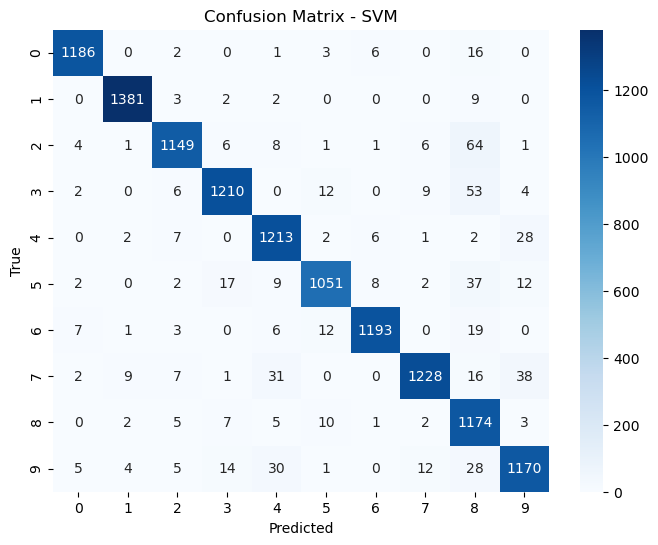

In [136]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_svm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

## Prediccion Kaggle (Test)

In [143]:
y_pred_cnn_kaggle = cnn.predict(X_test_reshaped)
y_pred_labels_cnn_kaggle = np.argmax(y_pred_cnn_kaggle, axis=1)
y_pred_labels_cnn_kaggle

875/875 [==============================] - 25s 29ms/step


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [144]:
kaggle = pd.DataFrame({"Label":y_pred_labels_cnn_kaggle})

In [145]:
kaggle.head()

,Label
0,2
1,0
2,9
3,9
4,3


In [146]:
kaggle["ImageId"]= kaggle.index+1

In [147]:
kaggle.head()

,Label,ImageId
0,2,1
1,0,2
2,9,3
3,9,4
4,3,5


In [148]:
kaggle = kaggle[['ImageId', 'Label']]

In [149]:
kaggle

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [150]:
kaggle.to_csv("digit_prediction.csv", index=False)

### Prueba con digitos escritos a mano

In [236]:
def test_model(image):
    image_path = image 
    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()
    image = image.convert('L')

    image_array = np.array(image)
    binary_image = np.where(image_array < 128, 255, 0)  

    binary_image = Image.fromarray(binary_image.astype(np.uint8))
    binary_image = binary_image.resize((28, 28))
    plt.imshow(binary_image, cmap="gray")
    plt.show()

    binary_image = np.array(binary_image).flatten()
    pixel_columns = [f'pixel{i}' for i in range(len(binary_image))]
    data = [binary_image]
    im1 = pd.DataFrame(data, columns=pixel_columns)
    # Normalize pixel values
    binary_image_array = im1 / 255.0


    # Reshape the image
    binary_image_array_scaled = scaler.transform(binary_image_array)
    input_image = binary_image_array_scaled.reshape(1, 28, 28, 1)

    predicted_probabilities = cnn.predict(input_image)
    predicted_class = np.argmax(predicted_probabilities)

    print("Predicted Class:", predicted_class)



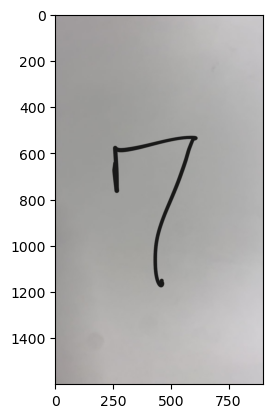

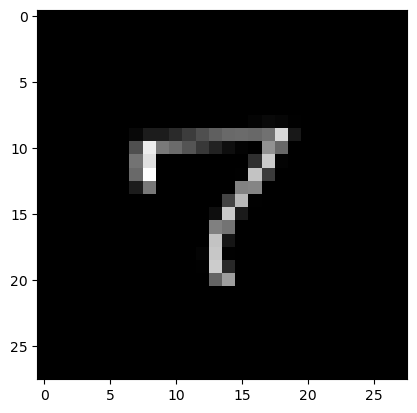

1/1 [==============================] - 0s 62ms/step
Predicted Class: 7


In [240]:
test_model("C:\\Users\\juana\\Downloads\\WhatsApp Image 2023-08-22 at 15.34.00.jpeg")